### Note for question3
- Please follow the template to complete q3
- You may create new cells to report your results and observations

In [83]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## P1. Load data and plot
### TODO
- load q3_data.csv
- plot the points of different labels with different color

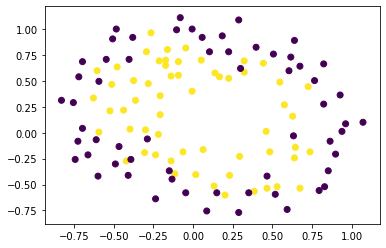

In [84]:
# Load dataset
data=pd.read_csv("C:/Radhika/CMU/SEM1/ML_AI/HW3/24787-hw3-handout/24787-hw3-handout/q3_data.csv",header=None)
x1=data.iloc[:,0]
x2=data.iloc[:,1]
labels=data.iloc[:,2]

# Plot points
plt.scatter(x1,x2,c=labels)
plt.show()


## P2. Feature mapping
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up

In [85]:
# Transform points to 28D space
def map_feature(x1,x2):
    dimension=28
    deg=6
    mf=np.ones((len(x1),dimension))
    col=0
    for i in range(1,deg+1):
        for j in range(i+1):
            col+= 1
            mf[:,col]=x1**(i-j)*x2**j
    return mf
inputs=map_feature(x1,x2).T
print(inputs.shape)

(28, 118)


## P3. Regularized Logistic Regression
### TODO
- implement function **logistic_regpression_regularized()** as required in the write-up
- the hyper-parameter $\lambda$ is set to 1
- draw the decision boundary

### Hints
- recycling code from HW2 is allowed
- you may use functions defined this section for part 4 below
- although optional for the report, plotting the convergence curve will be helpful

[ 1.01751236e+00  4.43195884e-01  9.52036236e-01 -1.62491923e+00
 -6.21366553e-01 -9.94547287e-01  3.25486613e-02 -2.67509056e-01
 -2.67171844e-01 -1.91241027e-01 -1.21974336e+00 -5.88885147e-02
 -4.74324697e-01 -1.75802478e-01 -9.82886112e-01 -2.46886003e-01
 -1.65203476e-01 -5.96279358e-02 -2.08232656e-01 -2.04751951e-01
 -4.96074259e-01 -8.91622482e-01  2.93091879e-04 -2.33670040e-01
  4.37328790e-05 -2.56047034e-01 -8.56889956e-02 -8.67719051e-01]
Accuracy when lambda is 1: 0.8305084745762712


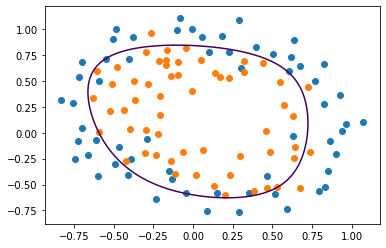

In [86]:
# Define your functions here
def sigmoid(value):
    sigma=1/(1+np.exp(-value))
    return sigma

def gradb0(inputs,inBrkt,labels):
    return -((inBrkt @ inputs.T)/len(labels))

def gradb(inputs,inBrkt,labels,lamb,weights):
    return (-(inBrkt @ inputs.T)/len(labels)+(lamb/len(labels))*weights[1:])

def cost(predicted,labels,weights,lamb):
    term=((-labels*np.log(predicted))-((1-labels)*np.log(1-predicted)))
    costs=(np.sum(term)/len(labels))+lamb*np.sum(weights[1:,]**2)/(2*len(labels))
    return cost

def logistic_regression_regularized(inputs,weights,labels,number_steps,learning_rate,lamb):
    checkCost=[]
    
    for i in range(number_steps):
        bTx=np.dot(weights.T,inputs)
        predicted=sigmoid(bTx)
        inBrkt=labels-predicted
        grad0=gradb0(inputs[0],inBrkt,labels)
        gradRest=gradb(inputs[1:],inBrkt,labels,lamb,weights)
        weights[0]=weights[0]-learning_rate*grad0
        weights[1:]=weights[1:]-learning_rate*gradRest
    return weights,checkCost

weights=np.zeros(28)
number_steps=10000
learning_rate=0.01
labels=np.array(labels)
lamb=1

weights,cost=logistic_regression_regularized(inputs,weights,labels,number_steps,learning_rate,lamb)
print(weights)

predt=sigmoid(np.dot(weights,inputs))
predt[np.where(predt>0.5)]=1
predt[np.where(predt<0.5)]=0
acc=0
for i in range(len(predt)):
    if predt[i]==labels[i]:
        acc+=1
print("Accuracy when lambda is 1:",acc/len(predt))
# Plot decision boundary
x=np.linspace(np.amin(x1),np.amax(x1),100)
y=np.linspace(np.amin(x2),np.amax(x2),100)
j1,j2=np.meshgrid(x,y)
gridX=j1.ravel()
gridY=j2.ravel()
g1=np.array(gridX).T
g2=np.array(gridY).T
pltGrid=map_feature(g1,g2)
sig=sigmoid(np.dot(weights,pltGrid.T))
plt.scatter(x1[labels==0],x2[labels==0])
plt.scatter(x1[labels==1],x2[labels==1])
plt.contour(j1,j2,sig.reshape(100,100),[0.5])


## P4. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 100]$
- draw the decision boundaries


[ 1.30842140e+00  6.99970574e-01  1.36301054e+00 -2.16888688e+00
 -9.29100016e-01 -1.31265012e+00  1.01949605e-01 -3.89042194e-01
 -3.75522697e-01 -2.32114598e-01 -1.66181248e+00 -9.10521331e-02
 -6.54923843e-01 -2.71367171e-01 -1.33604317e+00 -3.14177843e-01
 -2.38838440e-01 -7.49163024e-02 -2.96183805e-01 -2.99555974e-01
 -6.59785611e-01 -1.22505305e+00 -1.75705685e-03 -3.23388448e-01
 -1.49945165e-03 -3.57051760e-01 -1.37199610e-01 -1.18284101e+00]
Accuracy when lambda is 0: 0.8305084745762712


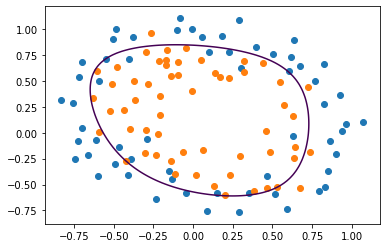

[ 0.02187771 -0.01748172  0.00571079 -0.05516895 -0.01314877 -0.03859858
 -0.01846356 -0.00773219 -0.00892429 -0.02280452 -0.04343846 -0.00235623
 -0.01415612 -0.00349508 -0.04143588 -0.02100593 -0.00471917 -0.00359131
 -0.00632226 -0.00502441 -0.03197676 -0.03416335 -0.00107629 -0.00702615
 -0.00038506 -0.0079823  -0.00154779 -0.04108677]
Accuracy when lambda is 100: 0.6101694915254238


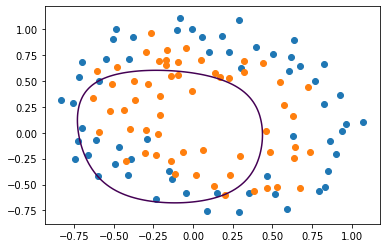

In [87]:
# lambda = 0
weights=np.zeros(28)
number_steps=10000
learning_rate=0.01
labels=np.array(labels)
lamb=0
weights,cost=logistic_regression_regularized(inputs,weights,labels,number_steps,learning_rate,lamb)
print(weights)
predt=sigmoid(np.dot(weights,inputs))
predt[np.where(predt>0.5)]=1
predt[np.where(predt<0.5)]=0
acc=0
for i in range(len(predt)):
    if predt[i]==labels[i]:
        acc+=1
print("Accuracy when lambda is 0:",acc/len(predt))

# Plot decision boundary
x=np.linspace(np.amin(x1),np.amax(x1),100)
y=np.linspace(np.amin(x2),np.amax(x2),100)
j1,j2=np.meshgrid(x,y)
gridX=j1.ravel()
gridY=j2.ravel()
g1=np.array(gridX).T
g2=np.array(gridY).T
pltGrid=map_feature(g1,g2)
sig=sigmoid(np.dot(weights,pltGrid.T))
plt.scatter(x1[labels==0],x2[labels==0])
plt.scatter(x1[labels==1],x2[labels==1])
plt.contour(j1,j2,sig.reshape(100,100),[0.5])
plt.show()

# lambda = 100
weights=np.zeros(28)
number_steps=10000
learning_rate=0.01
labels=np.array(labels)
lamb=100
weights,cost=logistic_regression_regularized(inputs,weights,labels,number_steps,learning_rate,lamb)
print(weights)

predt=sigmoid(np.dot(weights,inputs))
predt[np.where(predt>0.5)]=1
predt[np.where(predt<0.5)]=0
acc=0
for i in range(len(predt)):
    if predt[i]==labels[i]:
        acc+=1
print("Accuracy when lambda is 100:",acc/len(predt))

# Plot decision boundary
x=np.linspace(np.amin(x1),np.amax(x1),100)
y=np.linspace(np.amin(x2),np.amax(x2),100)
j1,j2=np.meshgrid(x,y)
gridX=j1.ravel()
gridY=j2.ravel()
g1=np.array(gridX).T
g2=np.array(gridY).T
pltGrid=map_feature(g1,g2)
sig=sigmoid(np.dot(weights,pltGrid.T))
plt.scatter(x1[labels==0],x2[labels==0])
plt.scatter(x1[labels==1],x2[labels==1])
plt.contour(j1,j2,sig.reshape(100,100),[0.5])
plt.show()

Observation:
Compare between $\lambda$ =[0,1,100] :

-It can be seen that the values of weights reduces as the lambda increases resulting in decreasing effect of few features in prediction hypothesis 

-With increase in lambda value accuracy decreases.

-With lambda 0 there is no regularization on the data set

-The most optimum value of lambda among 0,1,100 is 1